Machine Learning Project

Loading the libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

Importation of the dataset and first visualisation

In [20]:
data = pd.read_csv("Dataset_Projet.csv", sep=";")
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Preprocessing the data

In [21]:
#Lets check for missing values
print("Missing values per column :")
print(data.isnull().sum(), "\n")

#Encoding categorical values in numerical values
qualitative_cols = data.select_dtypes(include=["object", "category"]).columns

encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[qualitative_cols]).toarray()
encoded_df = pd.DataFrame(encoded,
                          columns=encoder.get_feature_names_out(qualitative_cols),
                          index=data.index)
data = data.drop(columns=qualitative_cols)
data = pd.concat([data, encoded_df], axis=1)

print(data.head())

Missing values per column :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...               0.0               0.0               1.0
1   18  33.770         1  ...               0.0               1.0               0.0
2   28  33.000         3  ...               0.0               1.0               0.0
3   33  22.705         0  ...               1.0               0.0               0.0
4   32  28.880         0  ...               1.0               0.0               0.0

[5 rows x 12 columns]


Exploring the data

First view of the dataset :


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0



Statistics on the dataset :


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


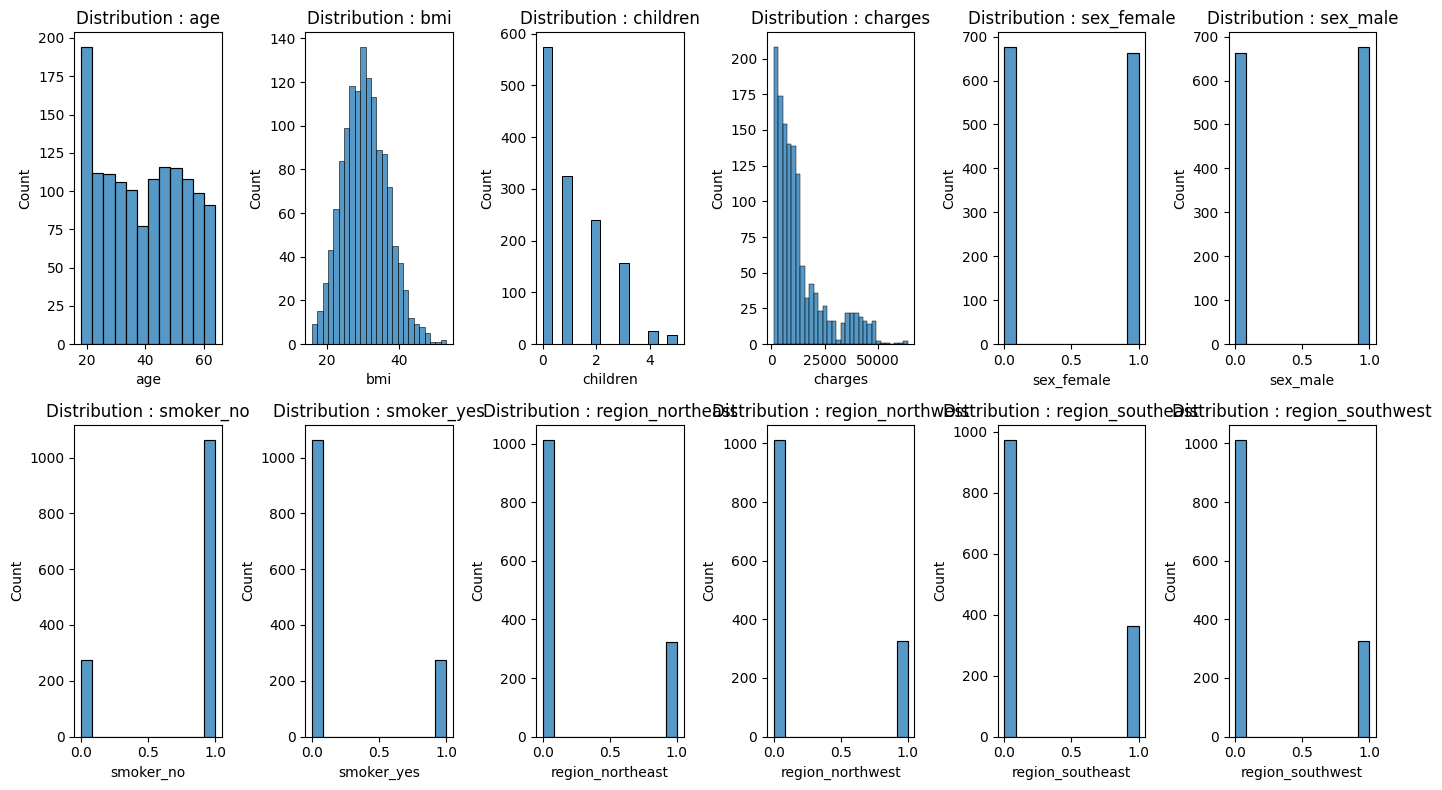

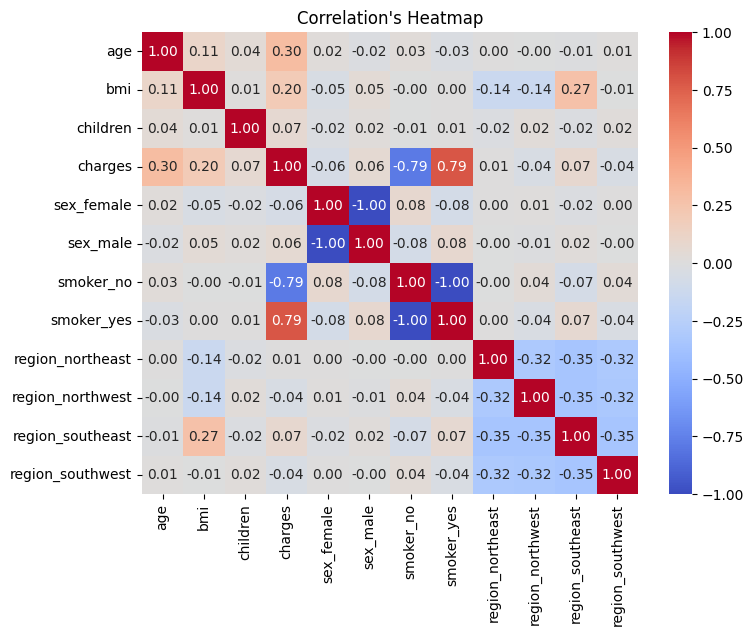

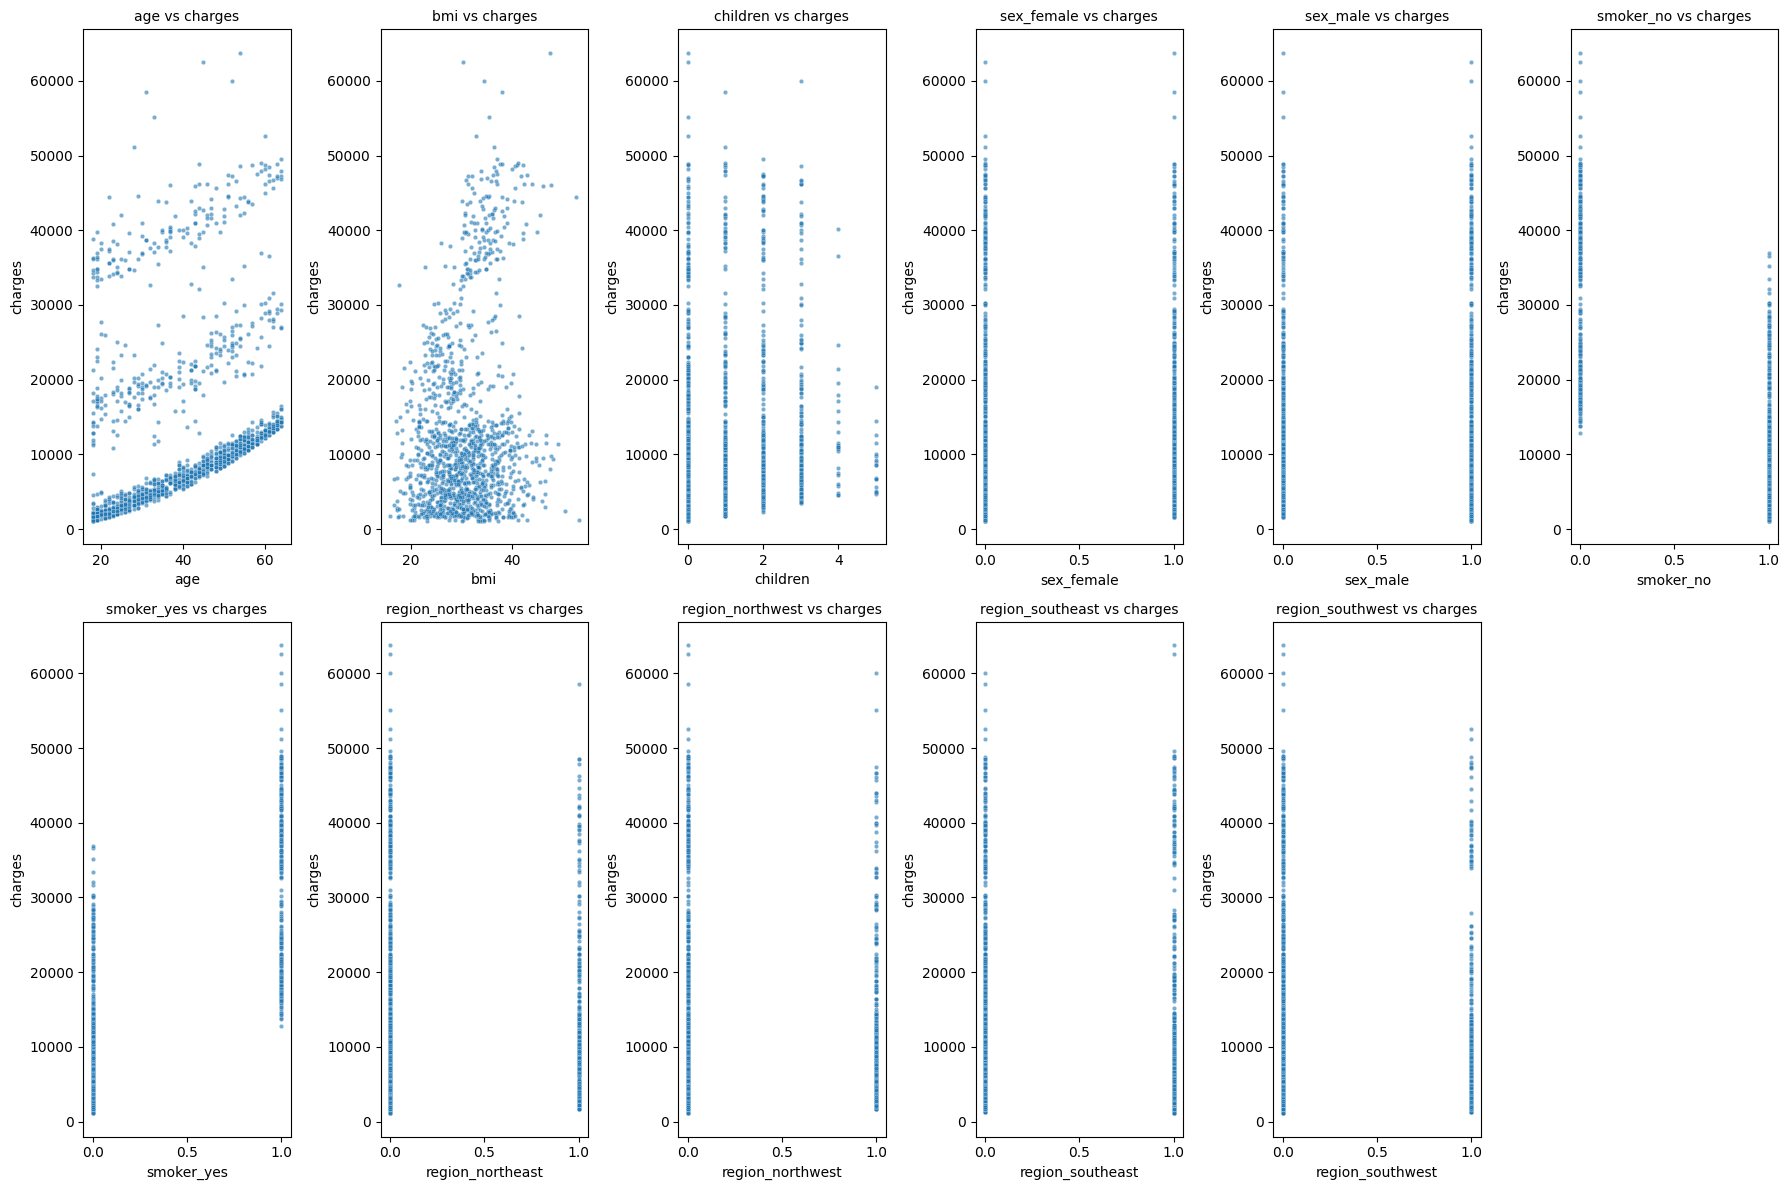

In [22]:
print("First view of the dataset :")
display(data.head())

print("\nStatistics on the dataset :")
display(data.describe())

# List of the different columns
num_cols = data.columns

# Lets check the spread of the differents variables
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)
    sns.histplot(data[col])
    plt.title(f"Distribution : {col}")
plt.tight_layout()
plt.show()

# Correlation's heatmap
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation's Heatmap")
plt.show()

# Scatterplots with the "charges" variable
target = "charges"

cols = [c for c in data.columns if c != target]
n = len(cols)
ncols = math.ceil(n / 2)
nrows = 2
plt.figure(figsize=(3 * ncols, 12))
plot_index = 1
for col in cols:
    plt.subplot(nrows, ncols, plot_index)
    sns.scatterplot(x=data[col], y=data[target], s=10, alpha=0.6)
    plt.title(f"{col} vs {target}", fontsize=10)
    plot_index += 1

plt.tight_layout()
plt.show()

Splitting the dataset

In [23]:
# Targeting the variable useful for the model
X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Visualization of the training set
print("\nFirst view of the training set :")
print(X_train.head())


First view of the training set :
      age    bmi  ...  region_southeast  region_southwest
560    46  19.95  ...               0.0               0.0
1285   47  24.32  ...               0.0               0.0
1142   52  24.86  ...               1.0               0.0
969    39  34.32  ...               1.0               0.0
486    54  21.47  ...               0.0               0.0

[5 rows x 11 columns]


Scaling the dataset

In [24]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


Preparing the First Model : Linear Regression


Model 1 (Linear Regression) Evaluation
MAE  (Mean Absolute Error)      : 4181.194
RMSE (Root Mean Squared Error)  : 5796.285
R²   (Coefficient de détermination) : 0.784


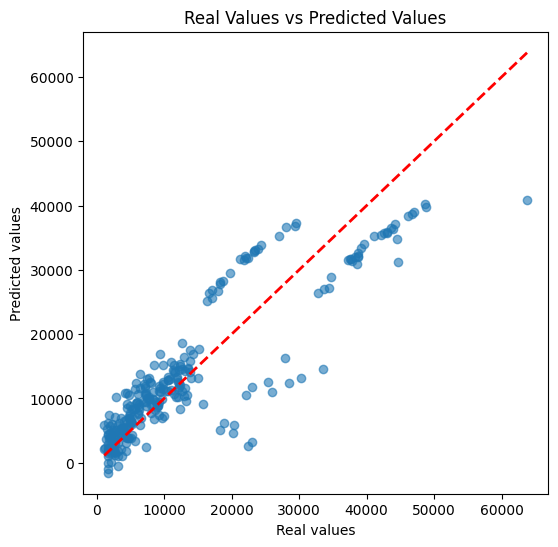

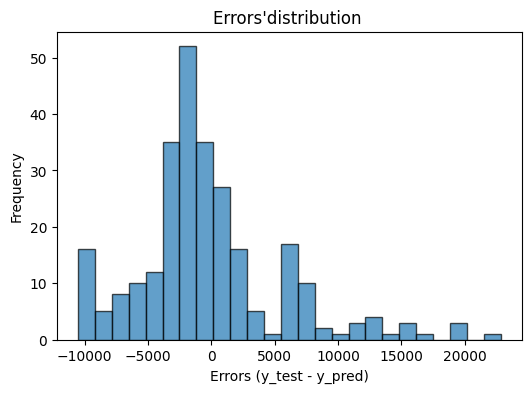

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel 1 (Linear Regression) Evaluation")
print(f"MAE  (Mean Absolute Error)      : {mae:.3f}")
print(f"RMSE (Root Mean Squared Error)  : {rmse:.3f}")
print(f"R²   (Coefficient de détermination) : {r2:.3f}")

# Visualization of the predicted values vs the real values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Real Values vs Predicted Values")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.show()

# Visualization of the errors
errors = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=25, edgecolor="k", alpha=0.7)
plt.title("Errors'distribution ")
plt.xlabel("Errors (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

Preparing the Second Model : Random Forest Regressor


Model 2 (Random Forest) Evaluation
MAE  : 2650.912
RMSE : 4694.060
R²   : 0.858


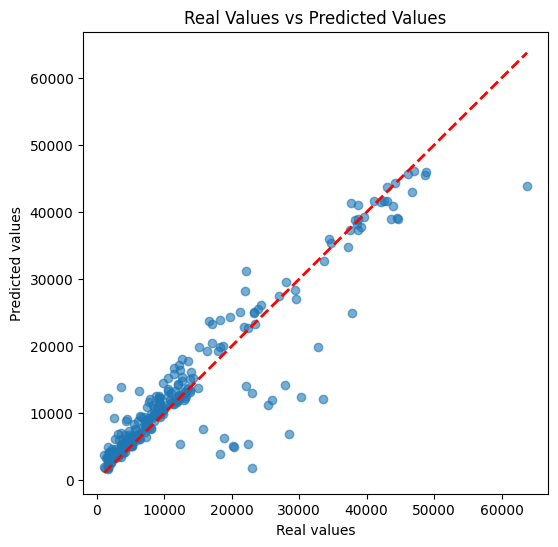

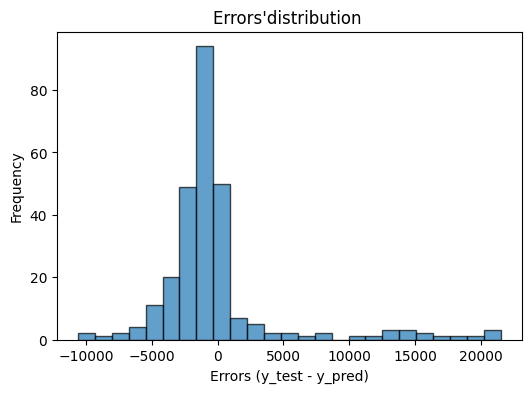

In [26]:
model2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

model2.fit(X_train_scaled, y_train)

y_pred2 = model2.predict(X_test_scaled)

mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)

print("\nModel 2 (Random Forest) Evaluation")
print(f"MAE  : {mae2:.3f}")
print(f"RMSE : {rmse2:.3f}")
print(f"R²   : {r2_2:.3f}")

# Visualization of the predicted values vs the real values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred2, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Real Values vs Predicted Values")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.show()

# Visualization of the errors
errors2 = y_test - y_pred2
plt.figure(figsize=(6, 4))
plt.hist(errors2, bins=25, edgecolor="k", alpha=0.7)
plt.title("Errors'distribution ")
plt.xlabel("Errors (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

Preparing the third model : Gradient Boosting Regressor


Model 3 (Gradient Boosting) Evaluation
MAE  : 2442.109
RMSE : 4339.370
R²   : 0.879


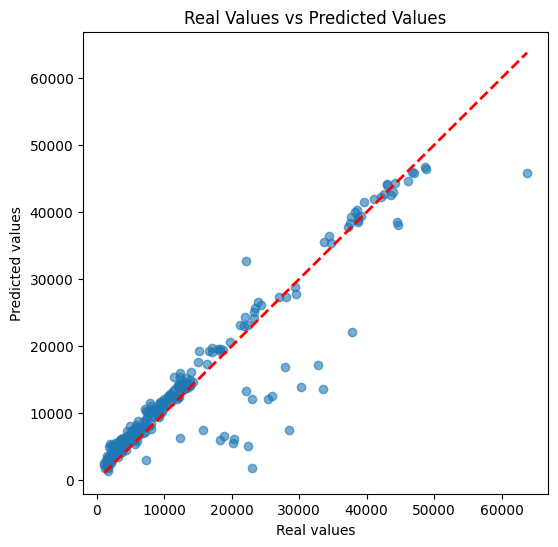

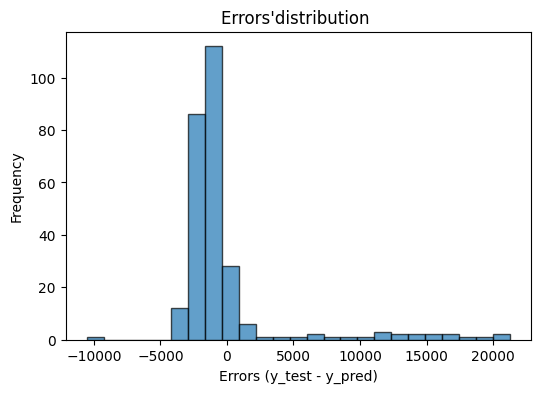

In [27]:
model3 = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=2,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

model3.fit(X_train_scaled, y_train)

y_pred3 = model3.predict(X_test_scaled)

mae3 = mean_absolute_error(y_test, y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
r2_3 = r2_score(y_test, y_pred3)

print("\nModel 3 (Gradient Boosting) Evaluation")
print(f"MAE  : {mae3:.3f}")
print(f"RMSE : {rmse3:.3f}")
print(f"R²   : {r2_3:.3f}")

# Visualization of the predicted values vs the real values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred3, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Real Values vs Predicted Values")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.show()

# Visualization of the errors
errors3 = y_test - y_pred3
plt.figure(figsize=(6, 4))
plt.hist(errors3, bins=25, edgecolor="k", alpha=0.7)
plt.title("Errors'distribution ")
plt.xlabel("Errors (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

Preparing the fourth model : KNN


Model 4 (KNN) Evaluation
MAE  : 3288.996
RMSE : 5445.144
R²   : 0.809


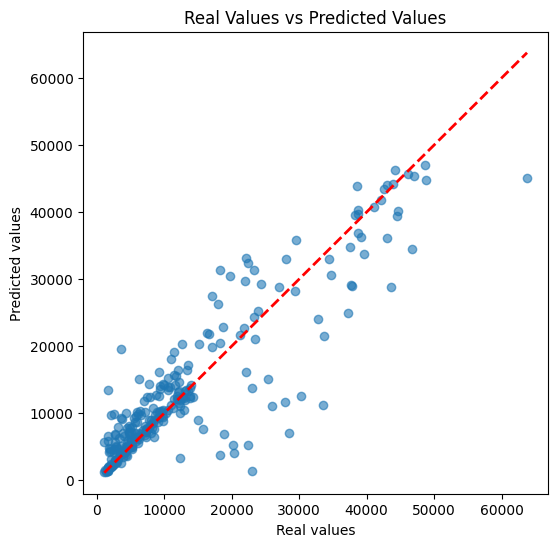

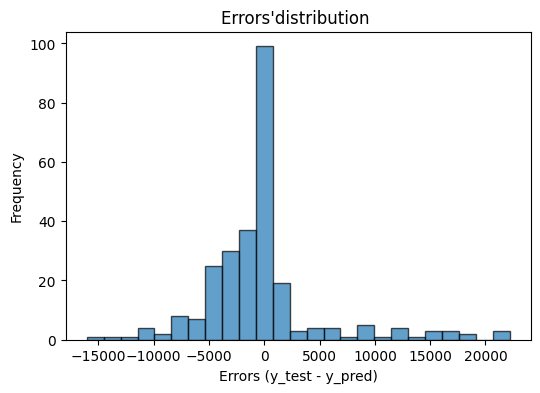

In [28]:
model4 = KNeighborsRegressor(
    n_neighbors=5,
    weights="distance",
    metric="manhattan",
    p=1
)

model4.fit(X_train_scaled, y_train)

y_pred4 = best_model.predict(X_test_scaled)
mae4 = mean_absolute_error(y_test, y_pred4)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
r2_4 = r2_score(y_test, y_pred4)

print("\nModel 4 (KNN) Evaluation")
print(f"MAE  : {mae4:.3f}")
print(f"RMSE : {rmse4:.3f}")
print(f"R²   : {r2_4:.3f}")

# Visualization of the predicted values vs the real values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred4, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Real Values vs Predicted Values")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.show()

# Visualization of the errors
errors4 = y_test - y_pred4
plt.figure(figsize=(6, 4))
plt.hist(errors4, bins=25, edgecolor="k", alpha=0.7)
plt.title("Errors'distribution ")
plt.xlabel("Errors (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

Comparing the different models

In [29]:
results = pd.DataFrame({
    "Modèle": [
        "Model 1 - Linear Regression",
        "Model 2 - Random Forest",
        "Model 3 - Gradient Boosting",
        "Model 4 - KNN"
    ],

    "MAE":  [mae,  mae2,  mae3,  mae4],
    "RMSE": [rmse, rmse2, rmse3, rmse4],
    "R²":   [r2,   r2_2,  r2_3,  r2_4]
})

print("COMPARISON OF THE DIFFERENT METRICS \n")
print(results)


COMPARISON OF THE DIFFERENT METRICS 

                        Modèle          MAE         RMSE        R²
0  Model 1 - Linear Regression  4181.194474  5796.284659  0.783593
1      Model 2 - Random Forest  2650.911503  4694.059847  0.858072
2  Model 3 - Gradient Boosting  2442.108940  4339.370242  0.878710
3                Model 4 - KNN  3288.995999  5445.143690  0.809019


We can now compare the different models we trained on that dataset. According to the different metrics, we can see that the most precise one is the Gradient Boosting Regressor since it has the best metrics.